## Category 변수의 표현 방법

- One-Hot Encoding
    - pd.get_dummies

## Numeric 실수형 변수의 표현 방법

- 사용하는 모델에 따라 표현 방식이 달라질 수 있다

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Output")
plt.xlabel("Input")
plt.legend(loc="best")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


연속형 모델에는 모든 데이터를 표현하는 것이 아닌, 구간 분할(이산화 : bining)을 시도할 수 있다.

In [2]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

# 10개의 구간을 분할
# 10: 2.4  ~  3
# 9:  1.8  ~  2.4
# 8:  1.2  ~  1.8
# 7:  0.6  ~  1.2
# 6:  0    ~  0.6
# 5:  -0.6 ~  0
# 4:  -1.2 ~ -0.6 
# 3:  -1.8 ~ -1.2
# 2:  -2.4 ~ -1.8
# 1:  -3   ~ -2.4

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [3]:
which_bin = np.digitize(X, bins=bins)
print("\n데이터:\n", X[:5])
print("\n데이터가 속한 구간:\n", which_bin[:5])


데이터:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

데이터가 속한 구간:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [4]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print("데이터가 속한 구간 One-hot Encoding :\n", X_binned[:5])

데이터가 속한 구간 One-hot Encoding :
 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Text(0.5,0,'Input feature')

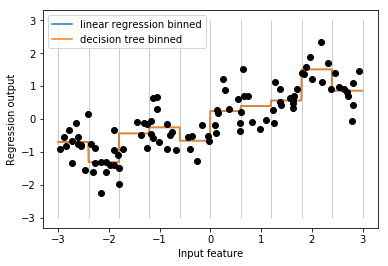

In [5]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

## Interaction & Polynomial

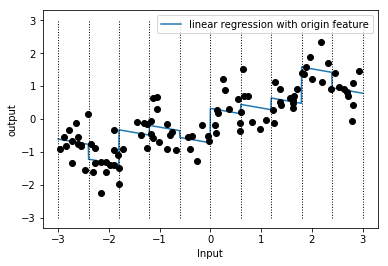

In [6]:
X_combined = np.hstack([X, X_binned])

reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression with origin feature')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
plt.legend(loc="best")
plt.ylabel("output")
plt.xlabel("Input")
plt.plot(X[:, 0], y, 'o', c='k')

In [7]:
X_product = np.hstack([X_binned, X * X_binned])

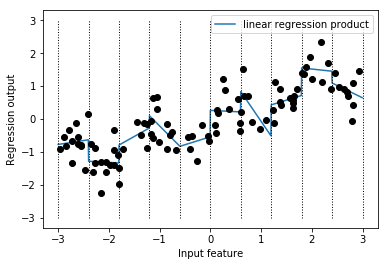

In [8]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [9]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [10]:
print("X_poly.shape: {}\n".format(X_poly.shape))
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

X_poly.shape: (100, 10)

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [11]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


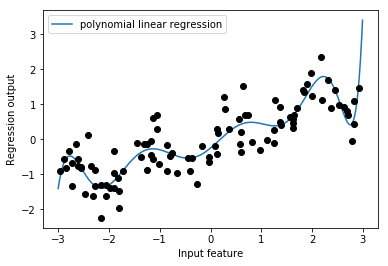

In [12]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

다항 회귀를 통해 부드러운 곡선의 형태를 구현할 수 있다

## log & exp를 이용한 비선형 변환

In [13]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

Text(0.5,0,'Value')

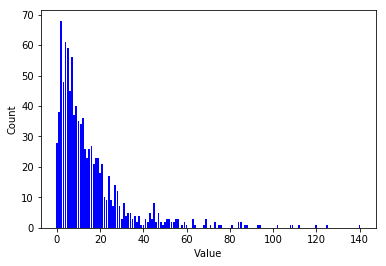

In [14]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='blue')
plt.ylabel("Count")
plt.xlabel("Value")

In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


In [16]:
# log(x+1) 적용

X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5,0,'Value')

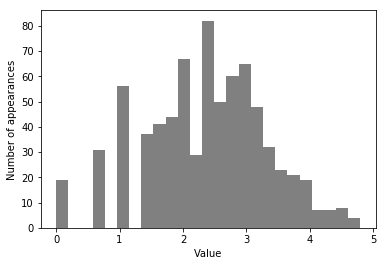

In [17]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [18]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


## Feature Selection (auto)

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 난수 발생
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# 데이터에 노이즈 특성 추가
# 첫 30개는 원본 특성, 그 다음 50개는 노이즈 특성
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# f_classif와 SelectPercentile을 통해  50%만 선택
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# 훈련 세트에 적용
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


([], <a list of 0 Text yticklabel objects>)

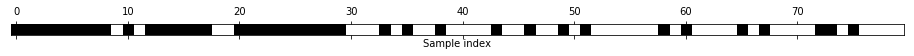

In [20]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

30번 이후의 노이즈 특성이 제거된 것을 확인할 수 있다

In [21]:
from sklearn.linear_model import LogisticRegression

# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 feature를 사용한 경우: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("노이즈를 제거한 경우: {:.3f}".format(
    lr.score(X_test_selected, y_test)))

전체 feature를 사용한 경우: 0.930
노이즈를 제거한 경우: 0.940


## Model Based Feature Selection

In [22]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([], <a list of 0 Text yticklabel objects>)

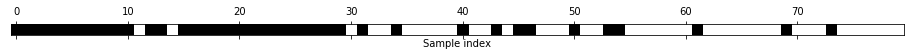

In [23]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [24]:
X_test_l1 = select.transform(X_test)
score1 = LogisticRegression().fit(X_train, y_train).score(X_test, y_test)
print("Test score original: {:.3f}".format(score1))
score2 = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score feature selected: {:.3f}".format(score2))

Test score original: 0.930
Test score feature selected: 0.951


## Feature Selection through Iteration

- 재귀적 특성 제거 : Recursive Feature Elimination
- 특성의 중요도를 결정하는 방법을 제공해야 한다 (ex. random forest)

([], <a list of 0 Text yticklabel objects>)

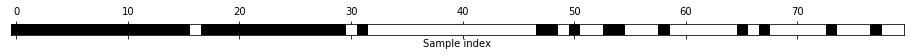

In [25]:


from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [26]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score (selected): {:.3f}".format(score))

print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score (selected): 0.951
Test score: 0.951


## Domain Knowledge

In [27]:
citibike = mglearn.datasets.load_citibike()
print("Citibike data:\n{}".format(citibike.head()))

Citibike data:
starttime
2015-08-01 00:00:00     3.0
2015-08-01 03:00:00     0.0
2015-08-01 06:00:00     9.0
2015-08-01 09:00:00    41.0
2015-08-01 12:00:00    39.0
Freq: 3H, Name: one, dtype: float64


Text(0,0.5,'Rentals')

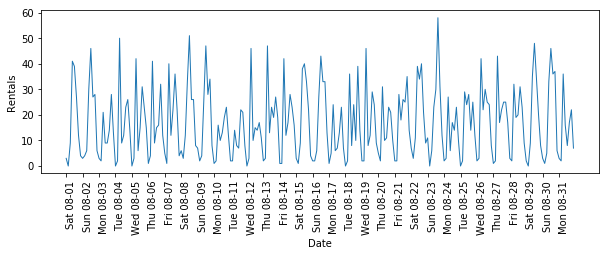

In [28]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
plt.xticks(xticks.astype("int"), xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [30]:
y = citibike.values
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [31]:
# function
# train, test split 
# evaluate model 

n_train = 184


def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
               ha="left")

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test-set R^2: -0.04


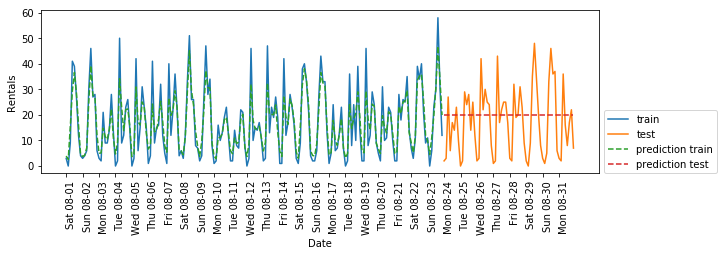

In [32]:
# 테스트 데이터에 대해서 약 20. 한가지 값으로만 예측.

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

Test-set R^2: 0.60


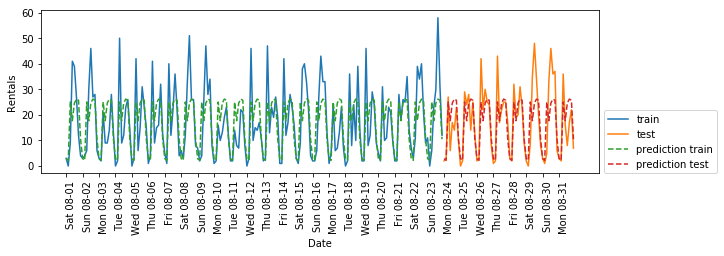

In [33]:
# 'hour' 특성 사용

X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

Test-set R^2: 0.84


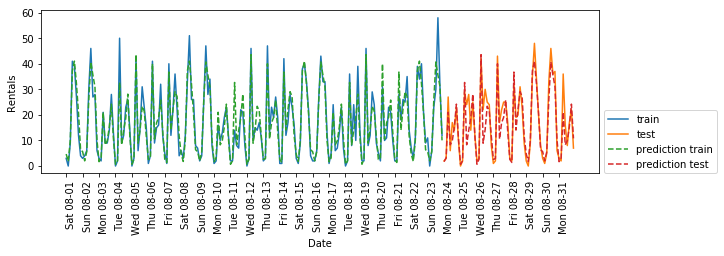

In [34]:
# 'dayofweek' 특성 추가

X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

Test-set R^2: 0.13


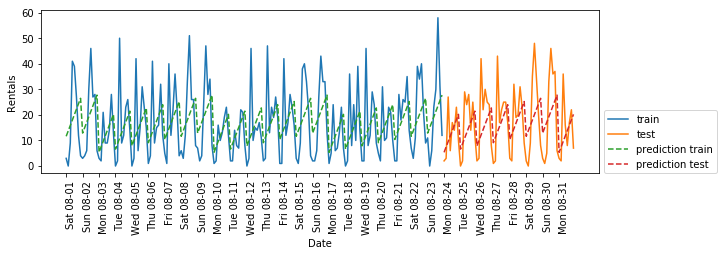

In [35]:
# 모델에 따라 달라지는 결과
# 이유 : one hot encoding이 되있지 않은 상황

from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

Test-set R^2: 0.62


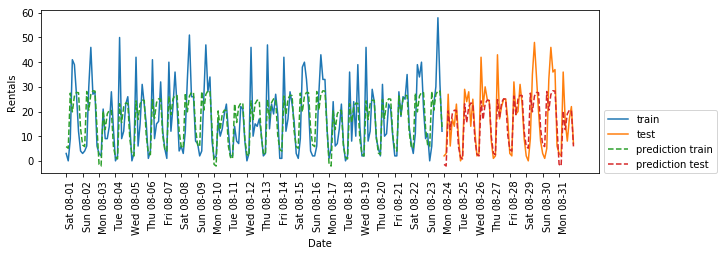

In [37]:
# one-hot encoding 이후

enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, Ridge())

Test-set R^2: 0.85


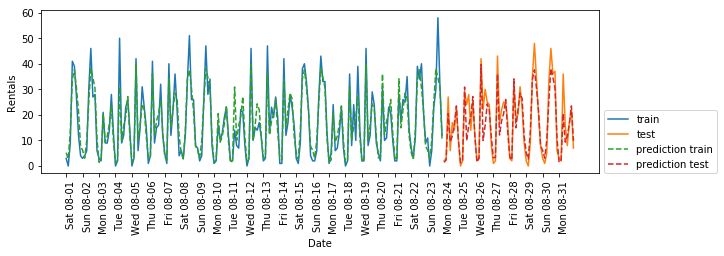

In [38]:
# interaction 부여

poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

랜덤포레스트와 달리, 로지스틱 회귀 모델을 썼음에도 어떠한 요소들이 학습되었는지 확인이 가능하다

In [43]:
# hour , day 특성에 text 의미를 부여

hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features =  day + hour

In [45]:
# 다항 피쳐

features_poly = poly_transformer.get_feature_names(features)
features_poly

['Mon',
 'Tue',
 'Wed',
 'Thu',
 'Fri',
 'Sat',
 'Sun',
 '00:00',
 '03:00',
 '06:00',
 '09:00',
 '12:00',
 '15:00',
 '18:00',
 '21:00',
 'Mon Tue',
 'Mon Wed',
 'Mon Thu',
 'Mon Fri',
 'Mon Sat',
 'Mon Sun',
 'Mon 00:00',
 'Mon 03:00',
 'Mon 06:00',
 'Mon 09:00',
 'Mon 12:00',
 'Mon 15:00',
 'Mon 18:00',
 'Mon 21:00',
 'Tue Wed',
 'Tue Thu',
 'Tue Fri',
 'Tue Sat',
 'Tue Sun',
 'Tue 00:00',
 'Tue 03:00',
 'Tue 06:00',
 'Tue 09:00',
 'Tue 12:00',
 'Tue 15:00',
 'Tue 18:00',
 'Tue 21:00',
 'Wed Thu',
 'Wed Fri',
 'Wed Sat',
 'Wed Sun',
 'Wed 00:00',
 'Wed 03:00',
 'Wed 06:00',
 'Wed 09:00',
 'Wed 12:00',
 'Wed 15:00',
 'Wed 18:00',
 'Wed 21:00',
 'Thu Fri',
 'Thu Sat',
 'Thu Sun',
 'Thu 00:00',
 'Thu 03:00',
 'Thu 06:00',
 'Thu 09:00',
 'Thu 12:00',
 'Thu 15:00',
 'Thu 18:00',
 'Thu 21:00',
 'Fri Sat',
 'Fri Sun',
 'Fri 00:00',
 'Fri 03:00',
 'Fri 06:00',
 'Fri 09:00',
 'Fri 12:00',
 'Fri 15:00',
 'Fri 18:00',
 'Fri 21:00',
 'Sat Sun',
 'Sat 00:00',
 'Sat 03:00',
 'Sat 06:00',
 'Sat 09:0

In [46]:
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
features_nonzero

array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', '00:00', '03:00',
       '06:00', '09:00', '12:00', '15:00', '18:00', '21:00', 'Mon 00:00',
       'Mon 03:00', 'Mon 06:00', 'Mon 09:00', 'Mon 12:00', 'Mon 15:00',
       'Mon 18:00', 'Mon 21:00', 'Tue 00:00', 'Tue 03:00', 'Tue 06:00',
       'Tue 09:00', 'Tue 12:00', 'Tue 15:00', 'Tue 18:00', 'Tue 21:00',
       'Wed 00:00', 'Wed 03:00', 'Wed 06:00', 'Wed 09:00', 'Wed 12:00',
       'Wed 15:00', 'Wed 18:00', 'Wed 21:00', 'Thu 00:00', 'Thu 03:00',
       'Thu 06:00', 'Thu 09:00', 'Thu 12:00', 'Thu 15:00', 'Thu 18:00',
       'Thu 21:00', 'Fri 00:00', 'Fri 03:00', 'Fri 06:00', 'Fri 09:00',
       'Fri 12:00', 'Fri 15:00', 'Fri 18:00', 'Fri 21:00', 'Sat 00:00',
       'Sat 03:00', 'Sat 06:00', 'Sat 09:00', 'Sat 12:00', 'Sat 15:00',
       'Sat 18:00', 'Sat 21:00', 'Sun 00:00', 'Sun 03:00', 'Sun 06:00',
       'Sun 09:00', 'Sun 12:00', 'Sun 15:00', 'Sun 18:00', 'Sun 21:00'],
      dtype='<U11')

In [47]:
coef_nonzero = lr.coef_[lr.coef_ != 0]
coef_nonzero

array([ -4.16724739,  -1.59581882,  -0.52439024,  -0.06010453,
         1.22560976,   2.26367831,   2.85827291, -11.69389764,
       -12.11122047,   8.61318898,  -0.07972441,   5.36909449,
         7.24311024,   7.63681102,  -4.9773622 ,   0.71826731,
         2.03125943,  -0.51204766,  -2.99236262,  -6.07897679,
        -3.2344886 ,   3.47023581,   2.43086573,  -1.96030412,
        -0.647312  ,   7.30938092,  -4.92093404,  -4.50754822,
        -2.91306003,   4.54166438,   1.5022943 ,  -2.76387555,
        -0.95088343,  15.00580949,  -5.97450547,  -5.56111965,
         1.03336854,  -1.76190705,   0.44872287,  -1.61208984,
        -1.04909771,  10.9075952 ,  -4.32271976,  -4.15933393,
        -3.31484574,   1.88987867,   1.60050859,  -2.57637555,
        -3.26338343,   7.69330949,  -2.78700547,  -1.12361965,
         3.47086854,   0.92559295,  -1.11377713,  -1.9119221 ,
        -3.97806383, -13.75759139,  15.19673932,  13.4376842 ,
         4.3384716 ,  -4.97648903,  -6.08515045,  -1.58

Text(0,0.5,'Feature magnitude')

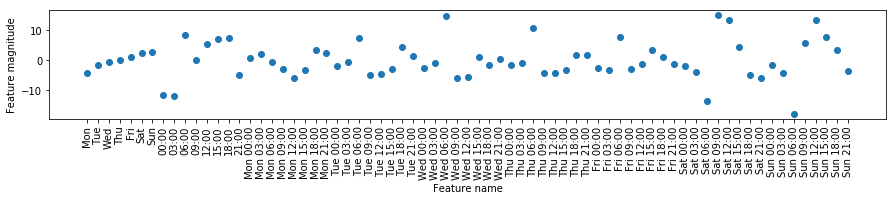

In [41]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")